# Joining Tables in R

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Joining" data-toc-modified-id="Joining-2">Joining</a></span></li><li><span><a href="#Inner-Join-I" data-toc-modified-id="Inner-Join-I-3">Inner Join I</a></span></li><li><span><a href="#Inner-Join-II" data-toc-modified-id="Inner-Join-II-4">Inner Join II</a></span></li><li><span><a href="#Join-on-Specific-Columns-I" data-toc-modified-id="Join-on-Specific-Columns-I-5">Join on Specific Columns I</a></span></li><li><span><a href="#Join-on-Specific-Columns-II" data-toc-modified-id="Join-on-Specific-Columns-II-6">Join on Specific Columns II</a></span></li><li><span><a href="#Mismatched-Joins" data-toc-modified-id="Mismatched-Joins-7">Mismatched Joins</a></span></li><li><span><a href="#Full-Join" data-toc-modified-id="Full-Join-8">Full Join</a></span></li><li><span><a href="#Left-and-Right-Joins" data-toc-modified-id="Left-and-Right-Joins-9">Left and Right Joins</a></span><ul class="toc-item"><li><span><a href="#Left-Join" data-toc-modified-id="Left-Join-9.1">Left Join</a></span></li><li><span><a href="#Right-Join" data-toc-modified-id="Right-Join-9.2">Right Join</a></span></li></ul></li><li><span><a href="#Concatenate-Data-Frames" data-toc-modified-id="Concatenate-Data-Frames-10">Concatenate Data Frames</a></span></li></ul></div>

## Introduction

In order to efficiently store data, we often spread related information across multiple tables.

In this lesson, we will learn the `dplyr` commands that help us work with data stored in multiple tables.

## Joining

The following three tables describe an eCommerce business:

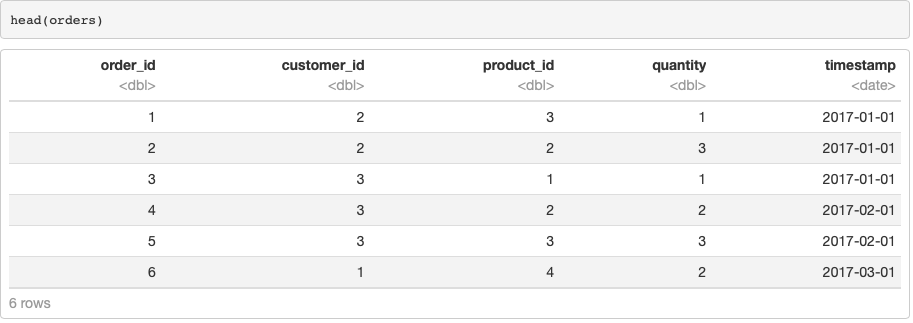

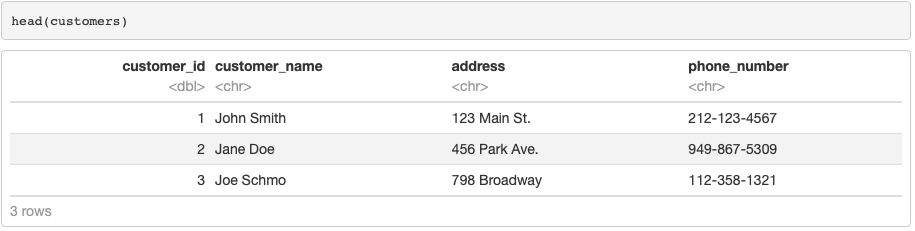

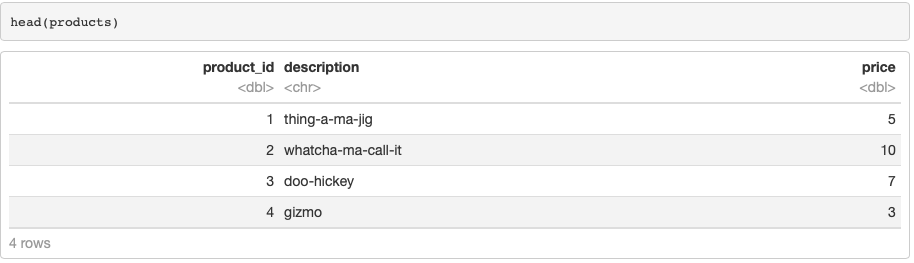

## Inner Join I

We can call the `inner_join()` method with two data frames to match up all of the customer information to the orders that each customer made:

```r
joined_df <- orders %>%
  inner_join(customers)
```

## Inner Join II

The following command would join `orders` with `customers`, and then join the resulting data frame with `products`:

```r
big_df <- orders %>% 
  inner_join(customers) %>%
  inner_join(products)
```

## Join on Specific Columns I

Generally, the `orders` data frame would not have the column `order_id` and the `customers` data frame would not have the column `customer_id.` 

Instead, they would both have a column `id` and it would be implied that the id was the `order_id` for the `orders` table and the `customer_id` for the `customers` table. They would look like this:

<figcaption><b>Orders</b></figcaption>

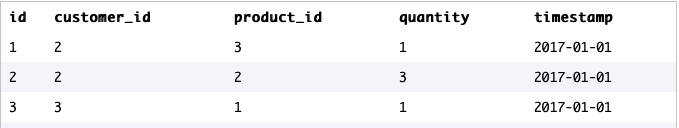

<figcaption><b>Customers</b></figcaption>

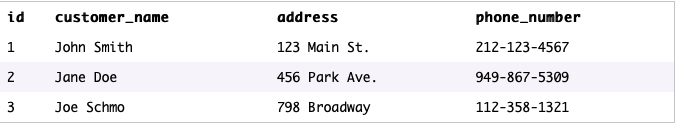

We will therefore have to rename the column `id` in the `customers` data frame to `customer_id`, so that `orders` and `customers` now have a common column to join on

```r
customers <- customers %>%
  rename(customer_id = id)
inner_join(orders, customers)
```

## Join on Specific Columns II

A better option to join two data frames whose columns don't match is to use the `by` argument.

```r
orders %>%
  inner_join(customers,
             by = c('customer_id = 'id'))
```

This syntax matches the `customer_id` from orders to the `id` in `customers` and we'll end up with two id columns called `id_x` and `id_y`.

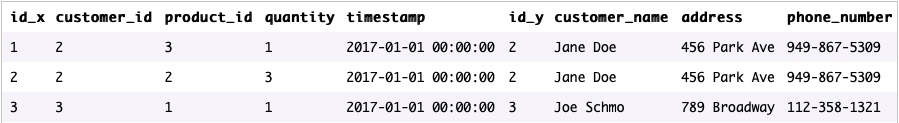

By using the keyword `suffix`, we can provide a vector of suffixes to use instead of "_x" and "_y".

```r
orders %>%
  inner_join(customers, 
             by = c('customer_id' = 'id'),
             suffix = c('_order','_customer'))
```

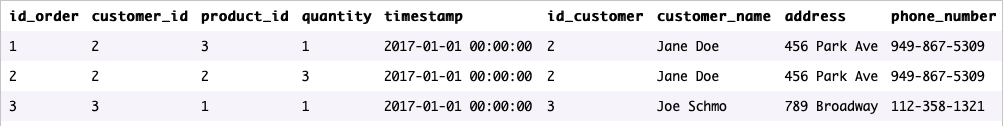

## Mismatched Joins

An inner join will only include rows that match perfectly.
When we join two data frames whose rows don't match perfectly, we lose the unmatched rows

## Full Join

When we join two data frames (using an inner join) whose rows don't match perfectly, we lose the unmatched rows.

We can use a `Full Join` when we want to keep information from unmatched rows.

**Example:**

Company A has each customer’s name and email. Company B has each customer’s name and phone number. They have some customers in common, but some are different.

<div align="center"><b>company_a</b></div>

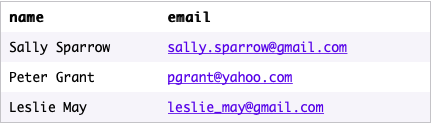

<div align="center"><b>company_b</b></div>

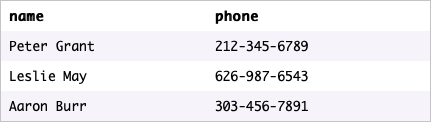

A Full Join would include all rows from both tables, even if they don’t match. Any missing values are filled in with `NA`.

```r
full_joined_dfs <- company_a %>%
  full_join(company_b)
```

<div align="center"><b>resulting table</b></div>

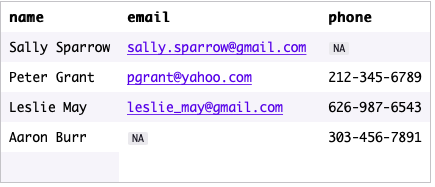

## Left and Right Joins

### Left Join

**Example:**

We would like to identify which customers are missing phone information. We could get this by performing a **Left Join**.

A **Left Join** includes all rows from the first (left) table, but only rows from the second (right) table that match the first table. 

By listing `company_a` first, we get all customers from Company A, and only customers from Company B who are **also** customers of Company A.

```r
left_joined_df <- company_a %>%
  left_join(company_b)
```

<div align="center">resulting table</div>

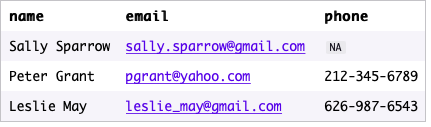

### Right Join

**Example:**

We would like to identify customers who have `phone` but no `email`. We could get this by performing a **Right Join**.

A Right Join includes all rows from the second (right) table, but only rows from the first (left) table that match the second table.

By listing `company_a` first and `company_b` second, we get all customers from Company B, and only customers from Company A who are also customers of Company B. 

```r
right_joined_df <- company_a %>%
  right_join(company_b)
```

<div align="center">resulting table</div>

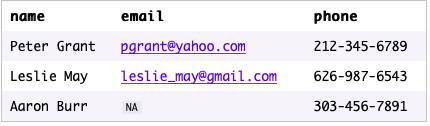

## Concatenate Data Frames

Data is often split into multiple files so that each download is smaller. 

When we need to reconstruct a single data frame from multiple smaller data frames, we can use the dplyr `bind_rows()` method. This method only works if all of the columns are the same in all of the data frames.

**Example:**

Combine the following data frames:

<div align='center'><b>df1</b></div>

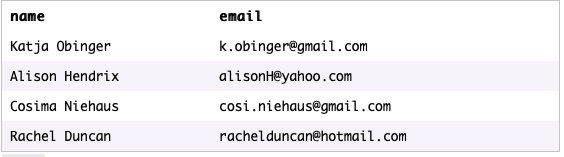

<div align='center'><b>df2</b></div>

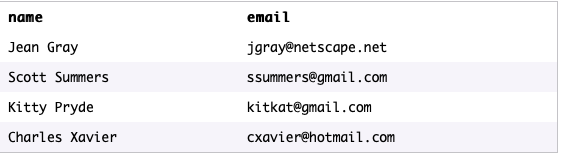

```r
concatenated_dfs <- df1 %>%
  bind_rows(df_2)
```

<div align='center'><b>resulting table</b></div>

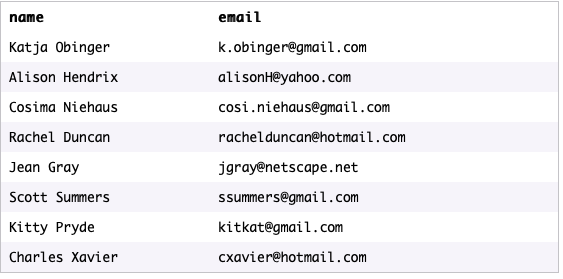